In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
df_train=pd.read_csv('C:\\Users\\Lenovo\\Documents\\projecs dataset\\train.csv')
df_train.head()

#saleprice is the dependent variable(that we need to predict)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns
#we filter out the columns by using the factor how important is this for our target variable.
#finally 'overall qual''yearbulit''total bsmtsf''grlivarea' or the importtant features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#analysing the sales price
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

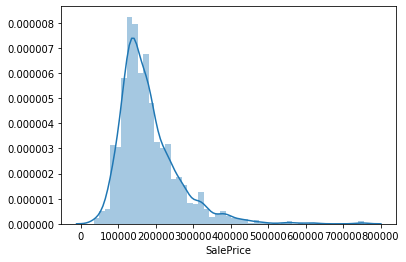

In [8]:
#distribution plot (univariate)
sns.distplot(df_train['SalePrice'])
#deviated from normal distribution,positively skewed

In [10]:
#skewness and kurtosis values
print('skewness:%f'%df_train['SalePrice'].skew())
print('kurtosis:%f'%df_train['SalePrice'].kurt())
#positively skewes and positivr curtosis

skewness:1.882876
kurtosis:6.536282


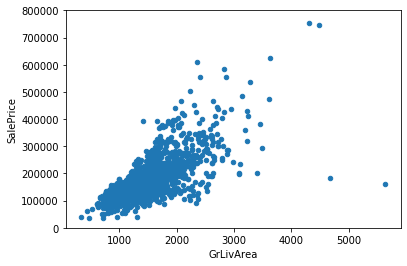

In [17]:
var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))
#gives the linear relationship

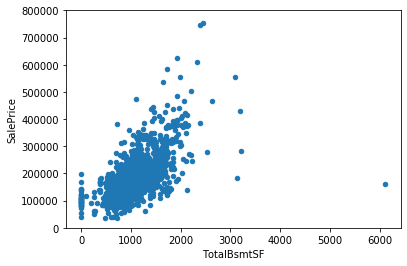

In [20]:
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))
#exxponential relationship

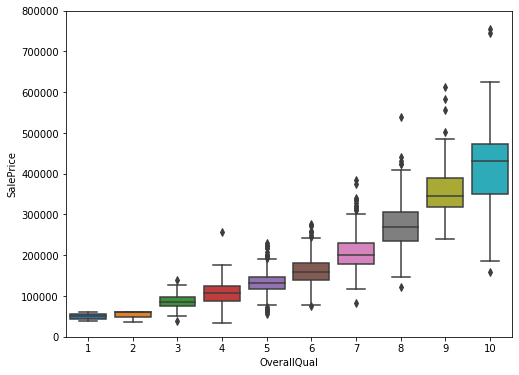

In [27]:
#categorical variables overallqual
var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000);

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

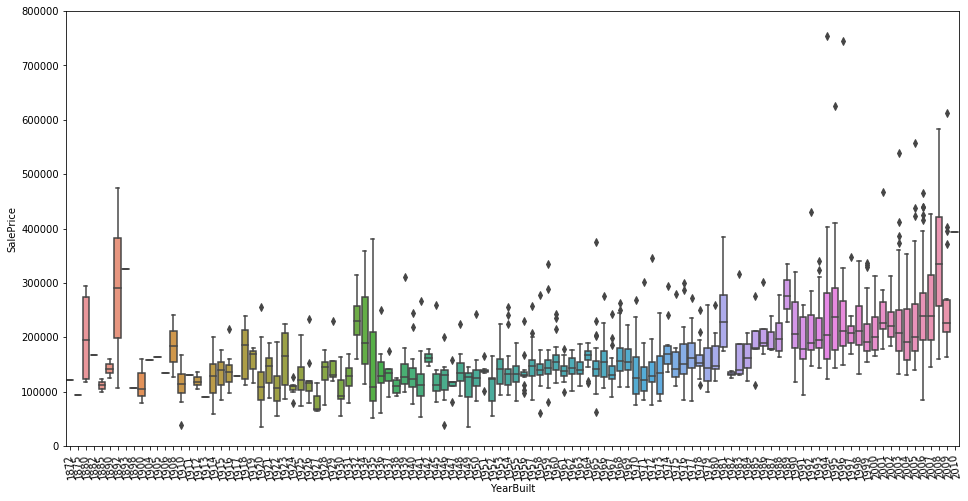

In [34]:
var='YearBuilt'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=100)

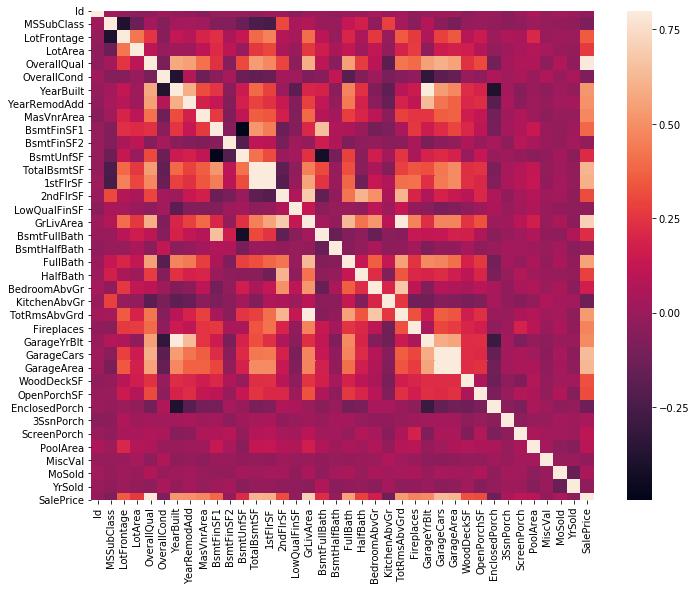

In [36]:
#correlation matrix
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

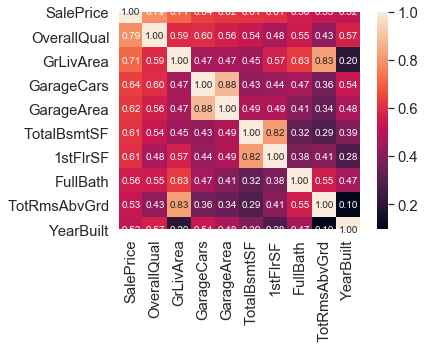

In [41]:
#digging into the saleprice
k=10#number of variables for heatmap
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.35)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},
               yticklabels=cols.values,xticklabels=cols.values)
plt.show()
#overallqual,grlivarea,totalbsmtsf are largely correlated with saleprice

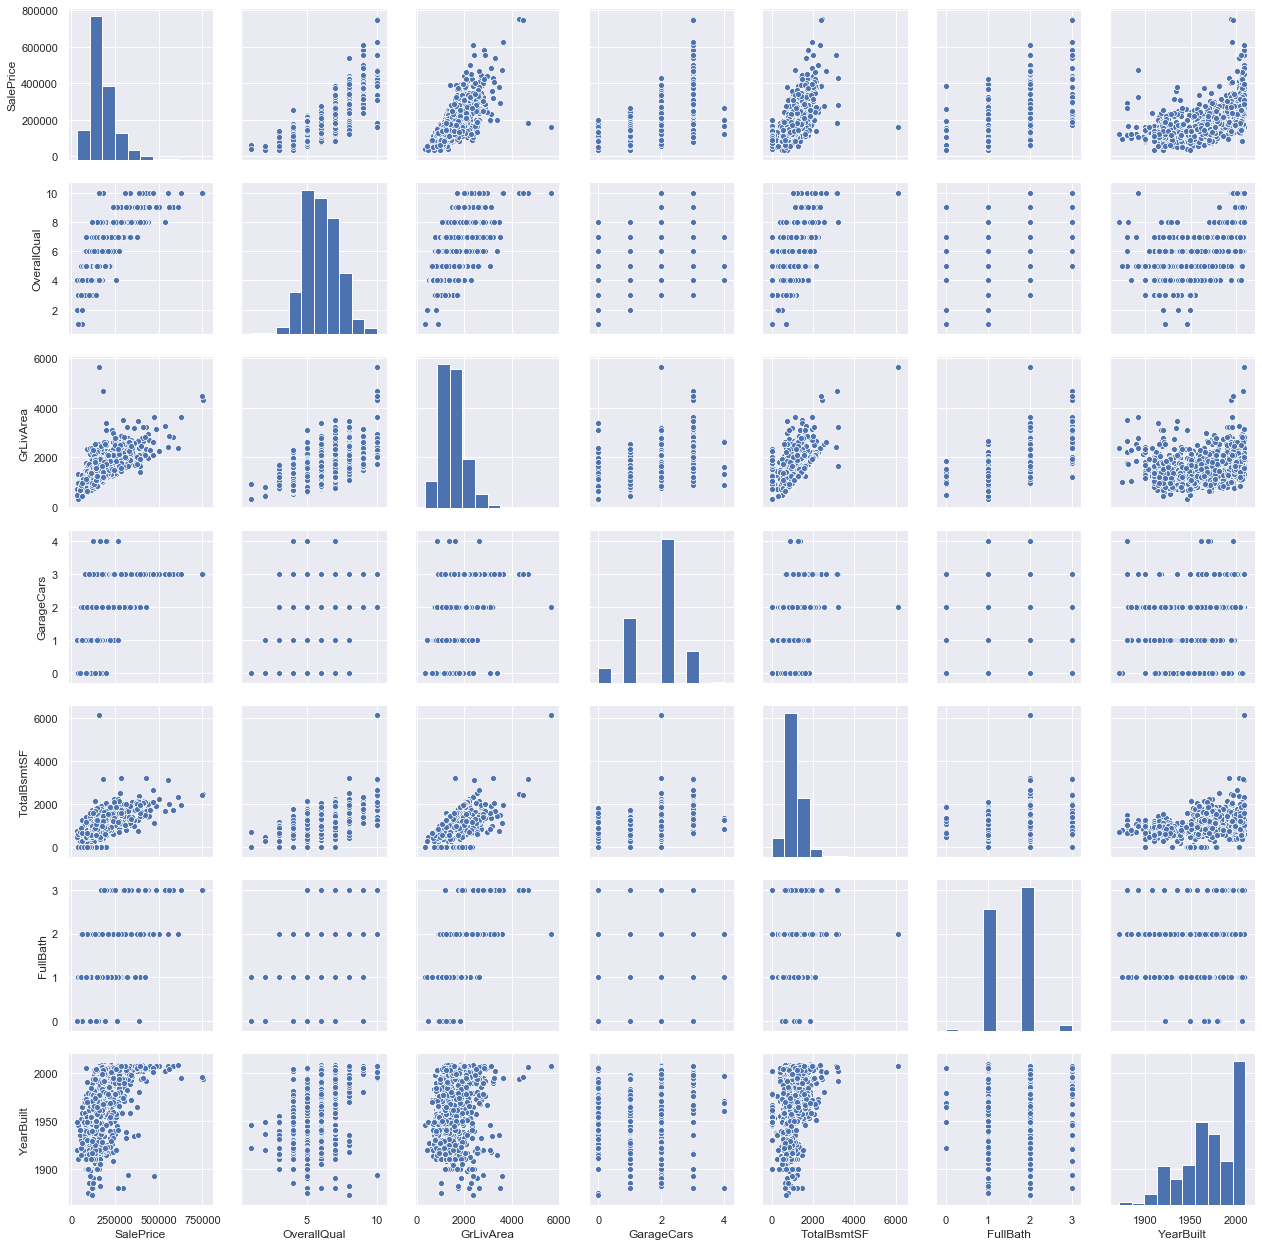

In [43]:
#correlation between saleprice and other variables
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

In [64]:
#handling missing data 
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
Electrical,1,0.000685
SalePrice,0,0.000000
Heating,0,0.000000
BsmtUnfSF,0,0.000000
BsmtFinSF2,0,0.000000
BsmtFinSF1,0,0.000000
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000


In [66]:
#handling missing data
df_train=df_train.drop((missing_data[missing_data['total']>1]).index,1)
df_train=df_train.drop((df_train.loc[df_train['Electrical'].isnull()]).index)
df_train.isnull().sum().max()

0

In [73]:
#standardizing the data for outlier detection
saleprice_scaled=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print(low_range)
print(high_range)
#low range values are similar.high range values are far from zero

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [75]:
df_train.sort_values(by='GrLivArea',ascending=False)[:2]
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

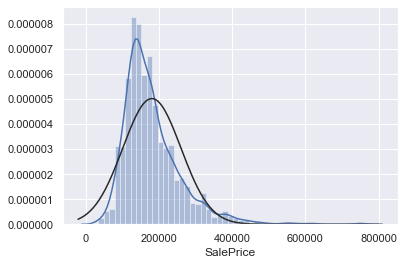

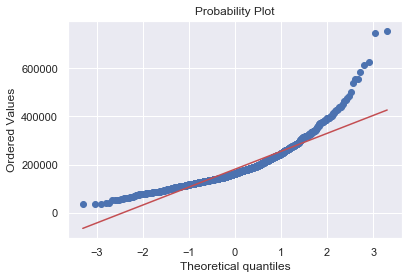

In [83]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [86]:
df_train['SalePrice']=np.log(df_train['SalePrice'])
#log transformation has solved the positve skewness

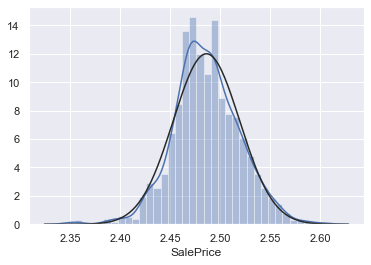

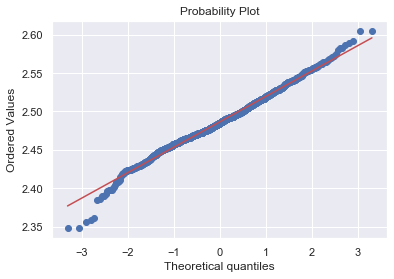

In [87]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

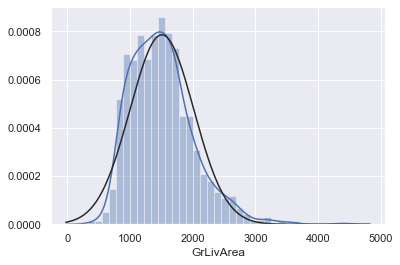

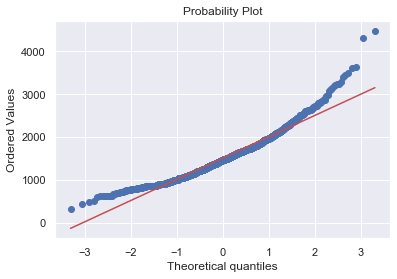

In [88]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

In [89]:
df_train['GrLivArea']=np.log(df_train['GrLivArea'])

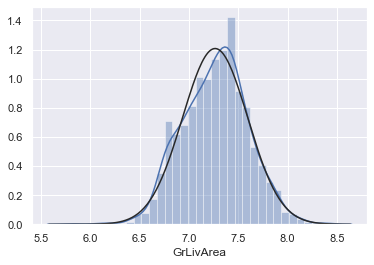

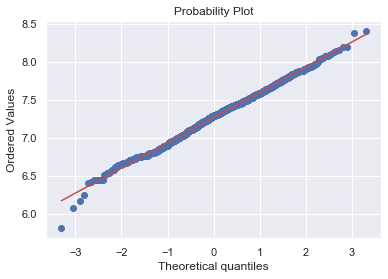

In [90]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

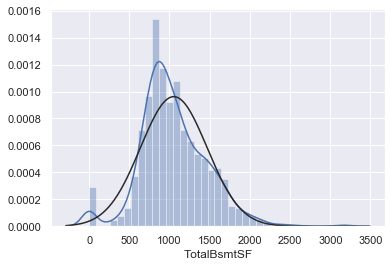

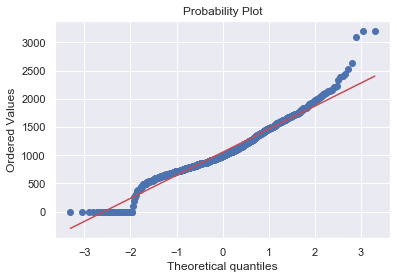

In [91]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


In [104]:
df_train['hasbsmf']=pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)
df_train['hasbsmf']=0
df_train.loc[df_train['TotalBsmtSF']>0,'hasbsmf']=1

In [105]:
df_train.loc[df_train['hasbsmf']==1,'TotalBsmtSF']=np.log(df_train['TotalBsmtSF'])

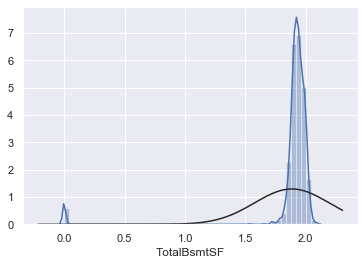

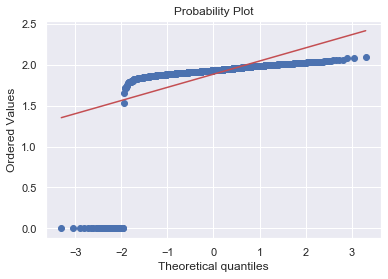

In [106]:
 sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


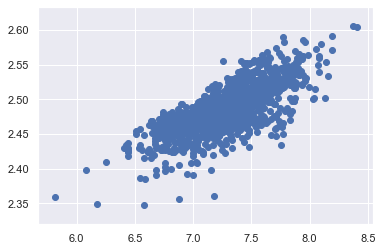

In [107]:
#checking for homoscedasticity
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

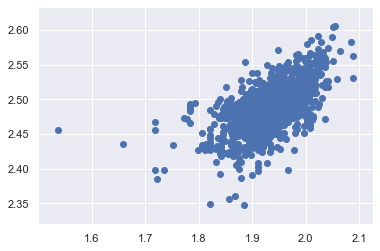

In [111]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

In [113]:
df_train=pd.get_dummies(df_train)

In [114]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
